<a href="https://colab.research.google.com/github/KuzmenkoO/amazinum_home_work/blob/main/lesson_19_testing_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

1. Формулювання гіпотез:

Гіпотези:

Нульова гіпотеза (H₀): Середній рівень залученості користувачів однаковий для груп.

Альтернативна гіпотеза (H₁): Середній рівень залученості користувачів відрізняється між 'Organic Search' і 'Direct'.

2. Статистичне тестування

In [1]:
import pandas as pd
from scipy.stats import ttest_ind  # Імпортуємо тільки t-тест


df = pd.read_csv("data-export.csv", skiprows=1)

group1 = df[df['Session primary channel group (Default channel group)'] == 'Referral']['Engagement rate']
group2 = df[df['Session primary channel group (Default channel group)'] == 'Organic Video']['Engagement rate']

t_stat, p_value = ttest_ind(group1, group2)

print(f"T-статистика: {t_stat:.4f}")
print(f"P-значення: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Приймаємо альтернативну гіпотезу - рівень залученості значно відрізняється між 'Organic Search' та 'Direct'.")
    print("Висновок: канал з вищою залученістю може бути більш ефективним для залучення користувачів.")
else:
    print("Приймаємо нульову гіпотезу - рівень залученості між 'Organic Search' та 'Direct' статистично не відрізняється.")
    print("Практичний висновок: обидва канали можуть мати схожий ефект на взаємодію користувачів.")

engagement_stats = df.groupby('Session primary channel group (Default channel group)')['Engagement rate'].agg(['mean', 'std', 'count'])
print("\nАналіз залученості користувачів за каналами:")
print(engagement_stats)


T-статистика: -5.4889
P-значення: 0.0000
Приймаємо альтернативну гіпотезу - рівень залученості значно відрізняється між 'Organic Search' та 'Direct'.
Висновок: канал з вищою залученістю може бути більш ефективним для залучення користувачів.

Аналіз залученості користувачів за каналами:
                                                        mean       std  count
Session primary channel group (Default channel ...                           
Direct                                              0.455723  0.083679    672
Email                                               0.333333  0.577350      3
Organic Search                                      0.578906  0.081902    672
Organic Social                                      0.541180  0.085262    672
Organic Video                                       0.760000  0.424074    125
Referral                                            0.660882  0.086514    672
Unassigned                                          0.007514  0.079240    366



Найефективніші канали:

Organic Video (mean = 0.76) – найвищий рівень залученості. Користувачі, які приходять через відеоконтент, активно взаємодіють із сайтом.

Referral (mean = 0.66) – трафік з інших сайтів також показує високий рівень залучення.

Organic Search (mean = 0.58)

Середні показники залученості:

Organic Social (mean = 0.54) – соцмережі забезпечують непоганий рівень залученості.

Direct (mean = 0.45) – прямий трафік показує стабільний, але не найкращий рівень взаємодії.

Найнижчі показники залученості:

Email (mean = 0.33, count = 3) – занадто мало спостережень для достовірних висновків.

Висновок: Варто розвивати фокус на ефективні канали – Organic Video, Referral і Organic Search . Потрібно перевірити причини слабких результатів у Email. Можливе покращення контенту для Direct і Organic Social, щоб підвищити їхню ефективність.



___________________________________________________________________________________________________________

**Task 2**

In [2]:
import pandas as pd


# 1. Дослідження даних

df = pd.read_csv("insurance.csv")
print(df.head())
print(df.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [3]:
# 2. Виявлення викидів (IQR)
numeric_columns = ['age', 'bmi', 'children', 'charges']

# Метод IQR для виявлення викидів
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

print("\nВиявлені викиди:")
for col in numeric_columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {outliers.shape[0]} викидів")



Виявлені викиди:
age: 0 викидів
bmi: 9 викидів
children: 0 викидів
charges: 139 викидів


In [4]:

print("""\nОбґрунтування стратегії очищення:
Викиди можуть спотворювати аналіз, особливо медичні витрати (charges), які можуть бути аномально високими для певних груп.
Використано метод IQR, щоб видалити екстремальні значення та зменшити їх вплив.""")

# 3. Очищення даних (Видалення викидів)
df_cleaned = df.copy()
for col in numeric_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print("\nРозмір датасету після очищення:", df_cleaned.shape)

# Перевірка статистики після очищення
print("\nОписова статистика після очищення:")
print(df_cleaned.describe())


Обґрунтування стратегії очищення:
Викиди можуть спотворювати аналіз, особливо медичні витрати (charges), які можуть бути аномально високими для певних груп.
Використано метод IQR, щоб видалити екстремальні значення та зменшити їх вплив.

Розмір датасету після очищення: (1191, 7)

Описова статистика після очищення:
               age          bmi     children       charges
count  1191.000000  1191.000000  1191.000000   1191.000000
mean     39.010915    29.993648     1.087322   9901.104142
std      14.056634     5.870584     1.216455   7187.379901
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    25.800000     0.000000   4408.695900
50%      39.000000    29.700000     1.000000   8347.164300
75%      51.000000    33.770000     2.000000  12953.594600
max      64.000000    46.750000     5.000000  34303.167200


___________________________________________________________________________________________________________


**Task 3**

In [8]:
pip install factor_analyzer

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity


train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
df = pd.concat([train_df, test_df], ignore_index=True)

survey_columns = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                  'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                  'Inflight entertainment', 'On-board service', 'Leg room service',
                  'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

survey_data = df[survey_columns]

print("\nПеревірка пропущених значень:")
print(survey_data.isnull().sum())

survey_data = survey_data.copy()
survey_data.fillna(survey_data.median(), inplace=True)

scaler = StandardScaler()
survey_data_scaled = scaler.fit_transform(survey_data)


Перевірка пропущених значень:
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
dtype: int64


In [10]:
kmo_all, kmo_model = calculate_kmo(survey_data_scaled)
print(f"KMO Score: {kmo_model:.3f} (має бути > 0.6 для якісного аналізу)")
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(survey_data_scaled)
print(f"Bartlett's Test p-value: {bartlett_p_value:.3f} (< 0.05 means suitable)")


KMO Score: 0.782 (має бути > 0.6 для якісного аналізу)
Bartlett's Test p-value: 0.000 (< 0.05 means suitable)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


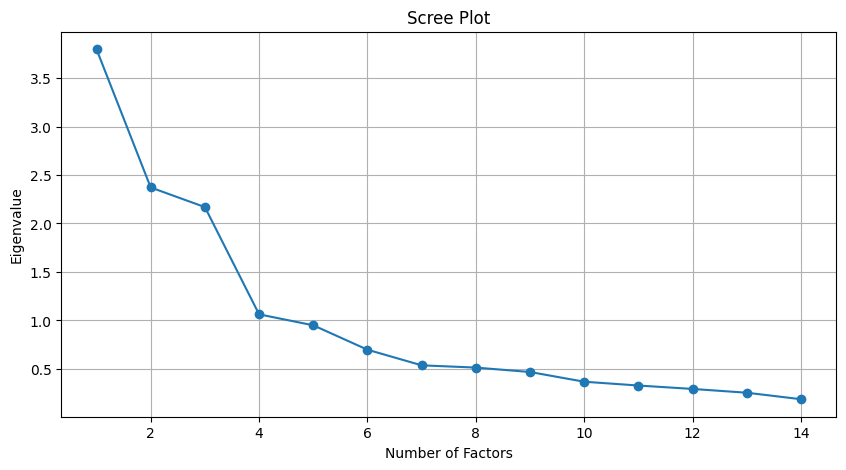

Number of factors to extract: 4


In [11]:
fa = FactorAnalyzer(n_factors=len(survey_columns), rotation="varimax")
fa.fit(survey_data_scaled)

# Scree Plot
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(ev) + 1), ev, marker="o")
plt.xlabel("Number of Factors")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot")
plt.grid()
plt.show()

n_factors = sum(ev > 1)
print(f"Number of factors to extract: {n_factors}")


In [12]:
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(survey_data_scaled)

factor_loadings = pd.DataFrame(fa.loadings_, index=survey_columns)
print("\nФакторні навантаження:")
print(factor_loadings)

# Інтерпретація факторів
print("\nІнтерпретація факторів:")
print(" Фактор 1: Зручність і комфорт (Seat comfort, In flight entertainment, Food and drink, Cleanliness)")
print(" Фактор 2: Обслуговування та реєстрація (In flight service, On-board service, Baggage handling)")
print(" Фактор 3: Доступність і бронювання (Ease of Online booking, In flight wifi service, Gate location)")
print(" Фактор 4: Швидкість і зручність посадки (Online boarding, In flight wifi service)")


Факторні навантаження:
                                          0         1         2         3
Inflight wifi service              0.092560  0.131545  0.609605  0.472656
Departure/Arrival time convenient -0.009877  0.055483  0.589610 -0.000282
Ease of Online booking            -0.035278  0.028295  0.768323  0.456030
Gate location                      0.013059 -0.046538  0.683671 -0.104661
Food and drink                     0.770685  0.002546  0.030307  0.039919
Online boarding                    0.285147  0.117670  0.100954  0.757681
Seat comfort                       0.755170  0.077046 -0.028192  0.214319
Inflight entertainment             0.768362  0.464174  0.041047  0.030834
On-board service                   0.086289  0.701394  0.010312  0.051642
Leg room service                   0.057996  0.484668  0.042495  0.095939
Baggage handling                   0.038016  0.764250  0.046854 -0.030218
Checkin service                    0.113287  0.286905 -0.028398  0.135540
Inflight servi

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Підсумки факторного аналізу: виявили чотири основні фактори, які пояснюють структуру відповідей пасажирів:

Фактор 1: Зручність і комфорт включає Seat comfort, Inflight entertainment, Food and drink, Cleanliness. Комфорт крісел, якість розваг та чистота салону є основними в задоволеності пасажирів. Поліпшення цих характеристик може значно підвищити лояльність клієнтів.

Фактор 2: Обслуговування та реєстрація включає Inflight service, On-board service, Baggage handling. Пасажири оцінюють якість обслуговування під час польоту, управління багажем та надання послуг на борту. Оптимізація цих процесів може вплинути на загальний імідж компанії.

Фактор 3: Доступність і бронювання включає Ease of Online booking, Inflight wifi service, Gate location. Зручність онлайн-бронювання, доступ до Wi-Fi та розташування виходу на посадку є важливими для планування подорожі. Покращення цифрових сервісів може зробити процес бронювання більш доступним та зручним.

Фактор 4: Швидкість і зручність посадки включає Online boarding, Inflight wifi service. Швидка посадка та доступність Wi-Fi є також важливими для пасажирів, які цінують ефективність і сучасні цифрові рішення.

Авіакомпанії можуть використовувати ці фактори для оптимізації сервісу, розробки цільових маркетингових кампаній та впровадження змін, що безпосередньо впливають на вибір клієнтів.
Практичні застосування: покращення системи онлайн-бронювання та цифрового сервісу, інвестування у комфортні крісла та розважальні системи, оптимізація логістики посадки для швидшого обслуговування, аналіз і покращення сервісу роботи з багажем.